In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [10]:

def plot_missing_values(filepath, separator):
    table = pd.read_table(filepath, delimiter = separator, dtype = str)
    #intensity = list(table.columns).startswith('Intensity')
    list_column_names=[]
    for item in table.columns:
          if item.startswith('Intensity '):
            list_column_names.append(item)
    intensity = table[list_column_names]
    series = pd.Series([i for i in range(1,intensity.shape[0]+1)])
    res_df= pd.DataFrame({'rank': series, 'percentage': pd.Series([], dtype = float)})
    display(res_df)
    counter = 0
    for row in intensity.iterrows():
        #row[1].applay(row[1]==0)
        percent = row[1][row[1]=='0'].shape[0]/intensity.shape[1]*100
        res_df.at[counter,'percentage']=percent
        counter = counter + 1
    res_df = res_df.sort_values(by = 'percentage',ascending = True).reset_index(drop=True)
    #cols = list(table.columns)
    #nulls = pd.isnull(intensity)
    return res_df

In [11]:
def less_20(df):
    df_res = df[df['percentage']<20]
    return df_res.shape[0]
#print(less_20(plot_missing_values('proteinGroups.txt', "\t")))

In [12]:
#display(plot_missing_values('proteinGroups.txt', "\t"))

In [8]:
df1 = plot_missing_values('DiscoveryModeProteinGroups_dia.txt', "\t")
df2 = plot_missing_values('LibraryModeProteinGroups_dia.txt', "\t")
df3 = plot_missing_values('proteinGroups_dda.txt', "\t")
#print(df3['percentage'][199])

,rank,percentage
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
442,443,NaN
443,444,NaN
444,445,NaN
445,446,NaN


,rank,percentage
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
465,466,NaN
466,467,NaN
467,468,NaN
468,469,NaN


,rank,percentage
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
725,726,NaN
726,727,NaN
727,728,NaN
728,729,NaN


In [13]:
import warnings
warnings.filterwarnings("ignore")

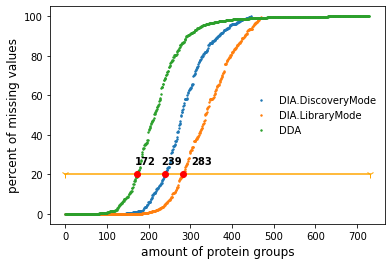

In [14]:
def plot_data(list_df):
    #print(df['rank'].shape[0])
    fig = plt.figure()
    plt.plot([0,int(list_df[2][1].shape[0])], [20,20],  marker = '1', markersize=7, color="orange")
    for df in list_df:
        plt.scatter(df[1].index,df[1]['percentage'],2,label = df[0])
        plt.plot([less_20(df[1])], [20],  marker = 'o', markersize=6, color="red")
    #fig = plt.figure()
    plt.text(less_20(list_df[0][1])-10, 25,less_20(list_df[0][1]),fontweight = 'bold')
    plt.text(less_20(list_df[1][1])+20, 25,less_20(list_df[1][1]),fontweight = 'bold')
    plt.text(less_20(list_df[2][1])-5, 25,less_20(list_df[2][1]),fontweight = 'bold')
    #plt.rcParams['font.sans-serif'] = "Arial"
    plt.rcParams['font.family'] = "sans-serif"
    plt.xlabel('amount of protein groups', fontsize = 12)
    plt.ylabel('percent of missing values', fontsize = 12)
    plt.legend(frameon = False)
    #plt.title('Missing values compare')
    return fig
plot_data([["DIA.DiscoveryMode",df1],["DIA.LibraryMode",df2],["DDA",df3]]).savefig("Chernova_plot_file.pdf")
